In [1]:
import pandas as pd
import matplotlib.pyplot as ptl
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
ptl.rcParams["figure.figsize"]=(10,5)
df=pd.read_csv('../data/Sample - Superstore.csv',encoding='ISO-8859-1')
print("Dimensiones: ",df.shape )
df.head()

Dimensiones:  (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
print (df.columns)
df.info()
df.isnull().sum()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
df.columns=df.columns.str.strip().str.replace(' ','_').str.lower()
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [5]:
df['order_date']=pd.to_datetime(df['order_date'])
df['ship_date']=pd.to_datetime(df['ship_date'])
df[['order_date','ship_date']].head()

,order_date,ship_date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18


In [6]:
df=df.drop_duplicates()

## Resumen estadístico general

In [7]:
df.describe()

,row_id,order_date,ship_date,postal_code,sales,quantity,discount,profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


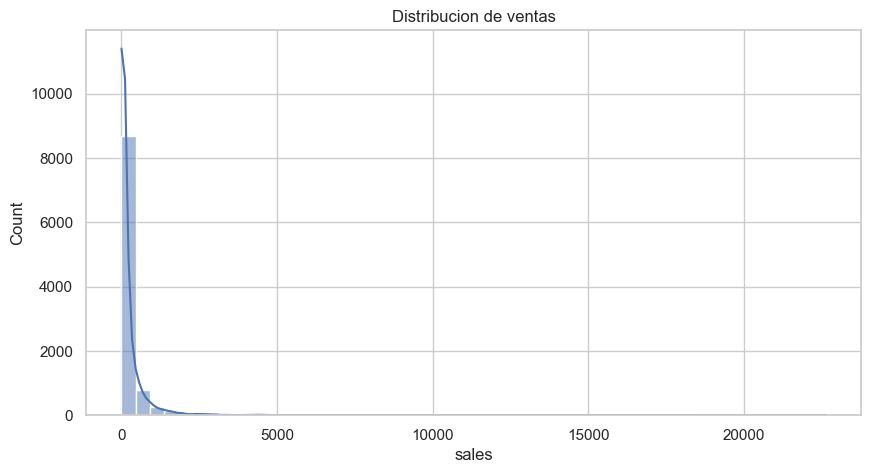

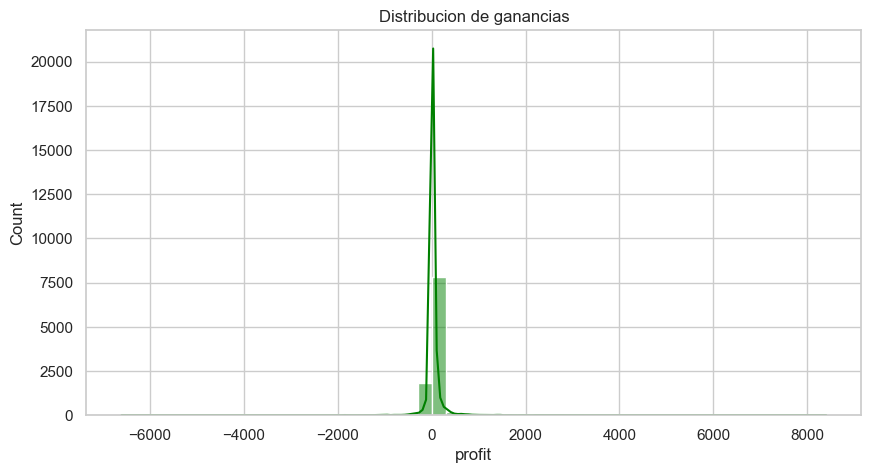

In [8]:
# Distribución de las ventas y ganancias
sns.histplot(df['sales'],bins=50,kde=True)
ptl.title('Distribucion de ventas')
ptl.show()

sns.histplot(df['profit'],bins=50,kde=True,color='green')
ptl.title('Distribucion de ganancias')
ptl.show()

## Ventas y ganancias por categoría y subcategoría

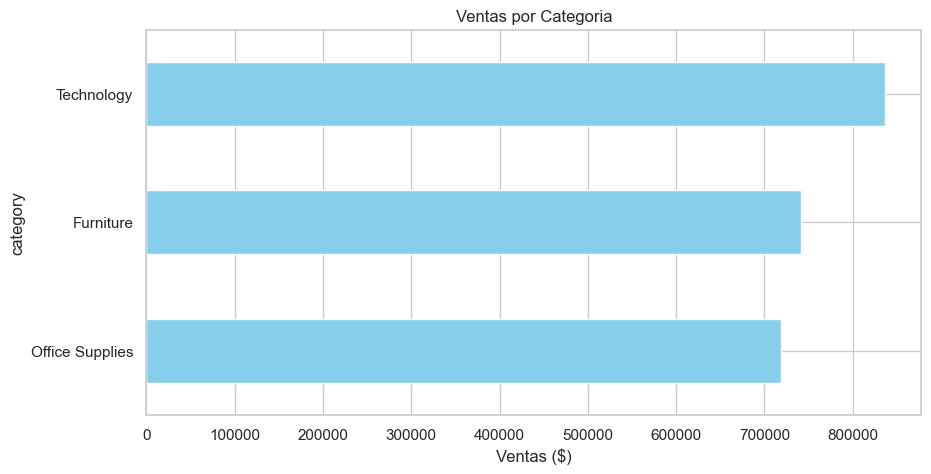

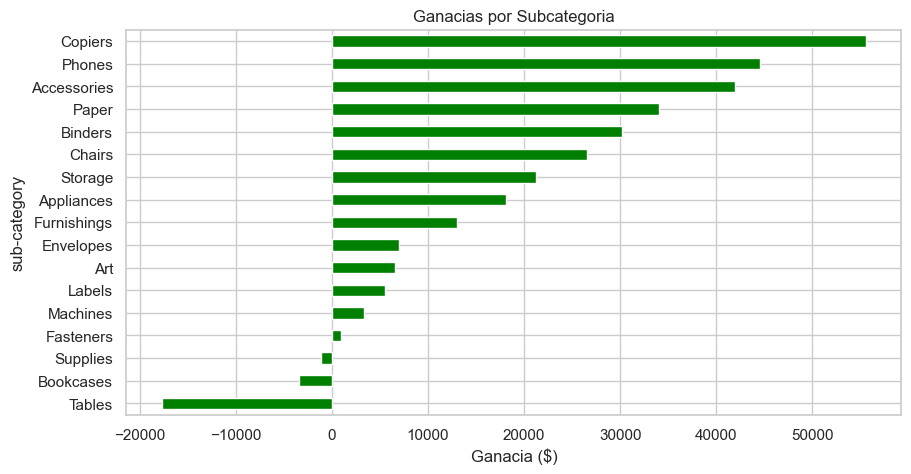

In [9]:
# Ventas por categoría
ventas_categoria=df.groupby('category')['sales'].sum().sort_values()
ventas_categoria.plot(kind='barh',title='Ventas por Categoria',color='skyblue')
ptl.xlabel('Ventas ($)')
ptl.show()

# Ganancias por subcategoría
ganacias_subcategoria=df.groupby('sub-category')['profit'].sum().sort_values()
ganacias_subcategoria.plot(kind='barh',title='Ganacias por Subcategoria',color='green')
ptl.xlabel('Ganacia ($)')
ptl.show()

## Productos más vendidos y más rentables

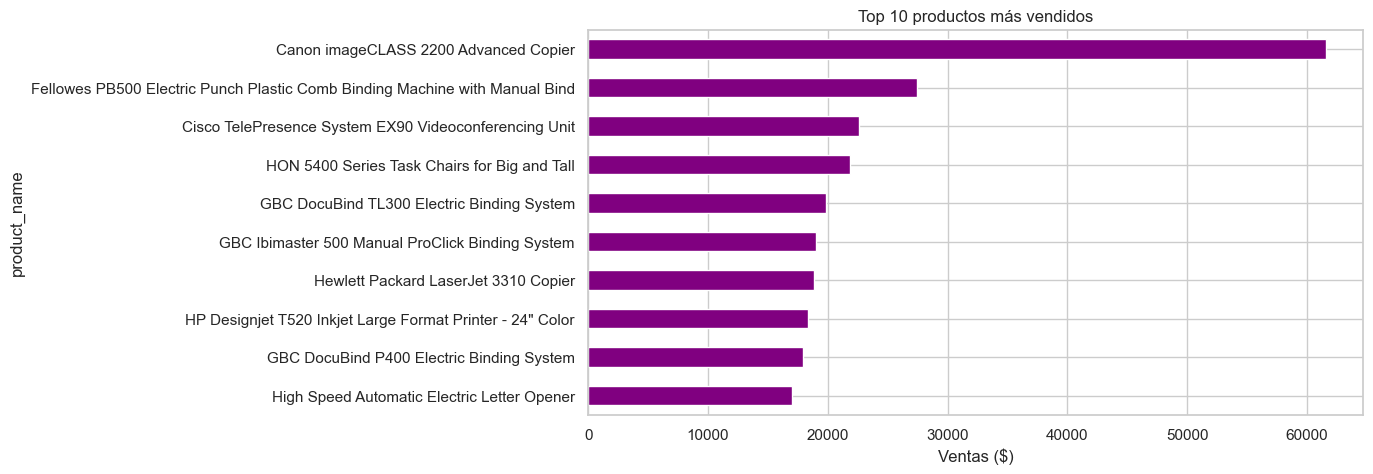

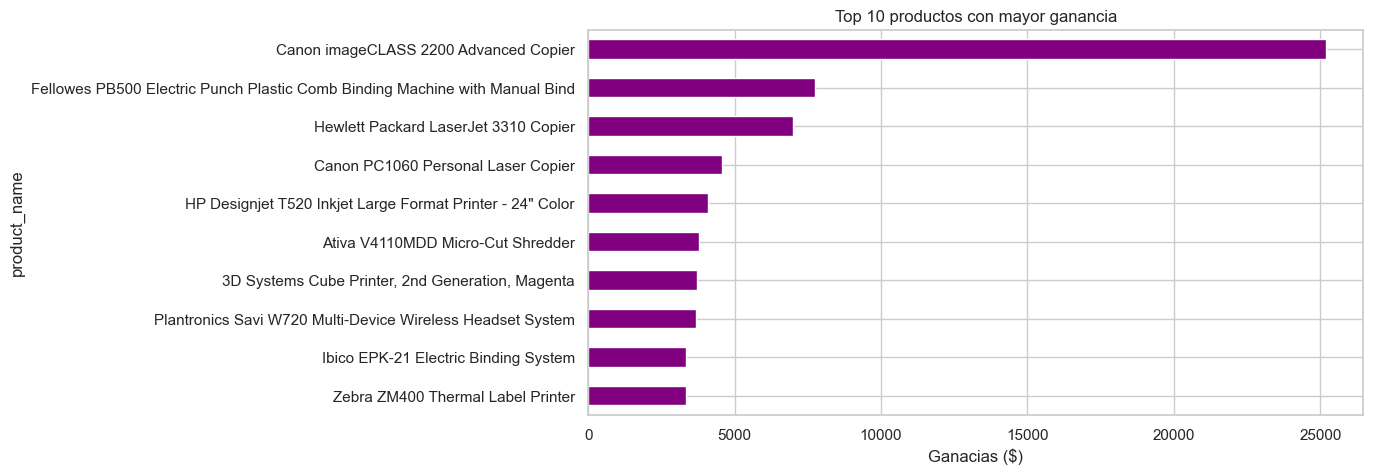

In [10]:
# Top 10 productos más vendidos
top_ventas=df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
top_ventas.plot(kind='barh',title='Top 10 productos más vendidos',color='purple')
ptl.xlabel('Ventas ($)')
ptl.gca().invert_yaxis()
ptl.show()

# Top 10 productos con mayor ganancia
top_ganacias=df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)
top_ganacias.plot(kind='barh',title='Top 10 productos con mayor ganancia',color='purple')
ptl.xlabel('Ganacias ($)')
ptl.gca().invert_yaxis()
ptl.show()

## Ventas y ganancias por región y estado

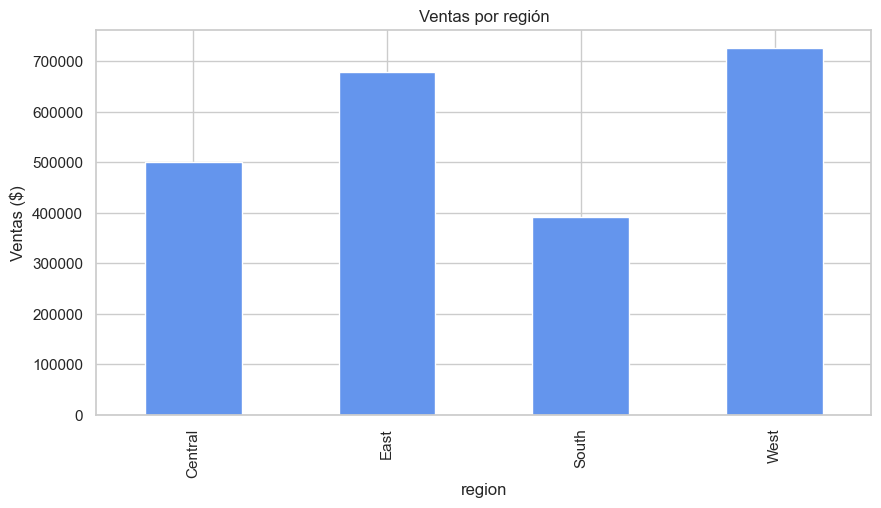

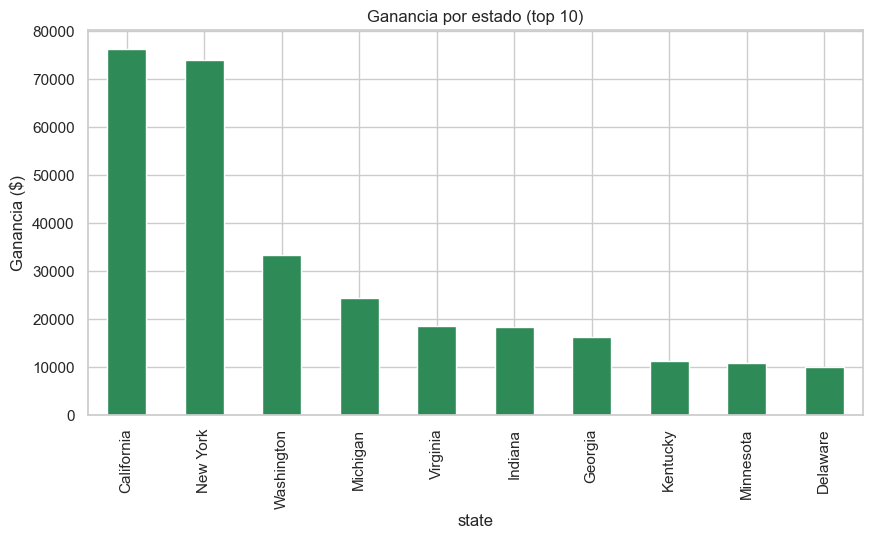

In [11]:
# Ventas por región
df.groupby('region')['sales'].sum().plot(kind='bar',title='Ventas por región',color='cornflowerblue')
ptl.ylabel('Ventas ($)')
ptl.show()

# Ganancia por estado (top 10)
ganacia_estado=df.groupby('state')['profit'].sum().sort_values(ascending=False).head(10)
ganacia_estado.plot(kind='bar',title='Ganancia por estado (top 10)', color='seagreen')
ptl.ylabel('Ganancia ($)')
ptl.show()

## Análisis temporal de ventas y ganancias

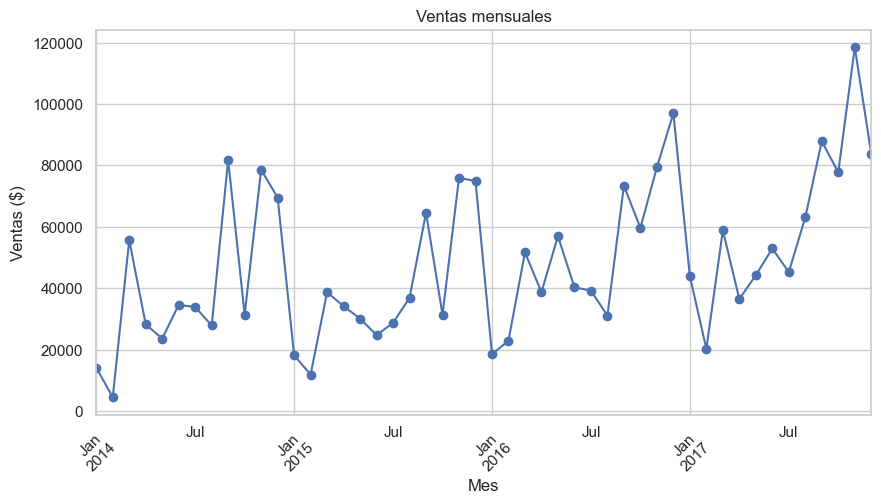

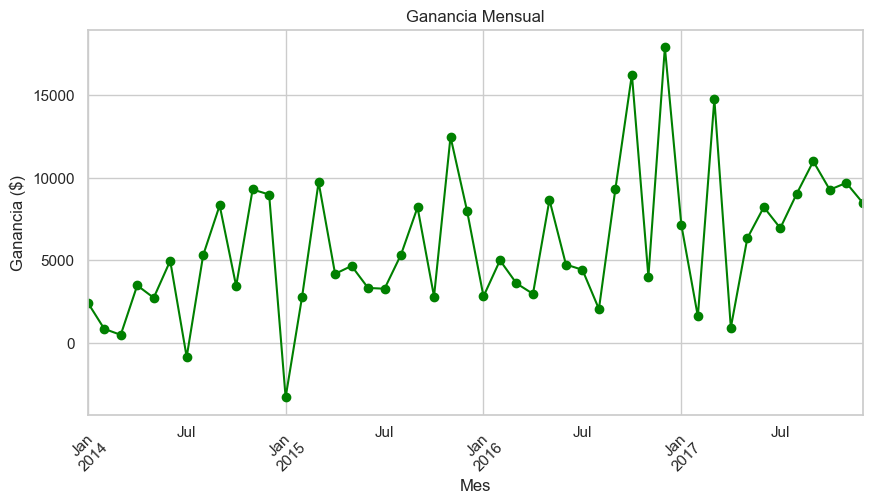

In [12]:
# Crear columna de mes/año
df['mes_anio']=df['order_date'].dt.to_period('M')

# Ventas mensuales
ventas_mensuales=df.groupby('mes_anio')['sales'].sum()
ventas_mensuales.plot(marker='o',title="Ventas mensuales")
ptl.ylabel('Ventas ($)')
ptl.xlabel('Mes')
ptl.xticks(rotation=45)
ptl.show()

# Ganancias mensuales
ganancia_mensual=df.groupby('mes_anio')['profit'].sum()
ganancia_mensual.plot(marker='o', color='green',title='Ganancia Mensual')
ptl.ylabel('Ganancia ($)')
ptl.xlabel('Mes')
ptl.xticks(rotation=45)
ptl.show()

##  Análisis de Segmento de Clientes

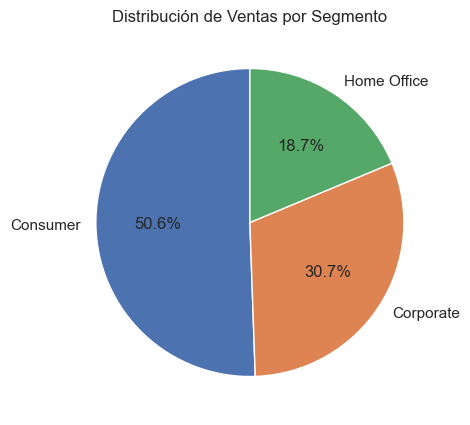

In [13]:
# Ventas por segmento
df.groupby('segment')['sales'].sum().plot(kind='pie',autopct='%1.1f%%',startangle=90,title='Distribución de Ventas por Segmento')
ptl.ylabel('')
ptl.show()

## Correlación entre variables numéricas

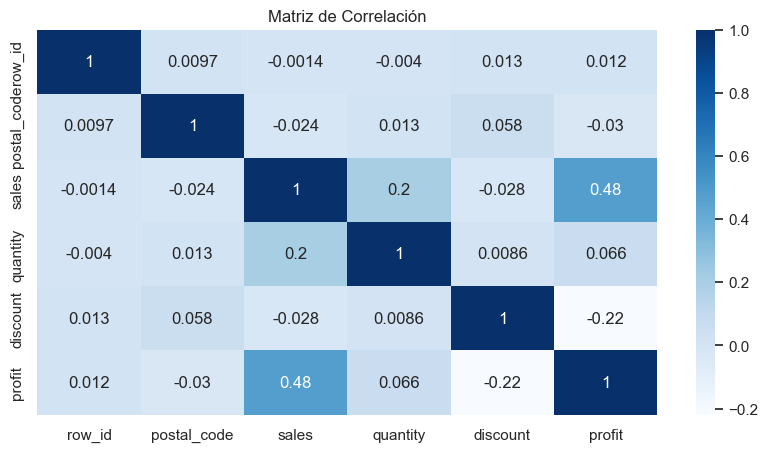

In [14]:
# Correlación entre variables
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')
ptl.title('Matriz de Correlación')
ptl.show()

## Detección de pérdidas (productos o regiones con pérdida)

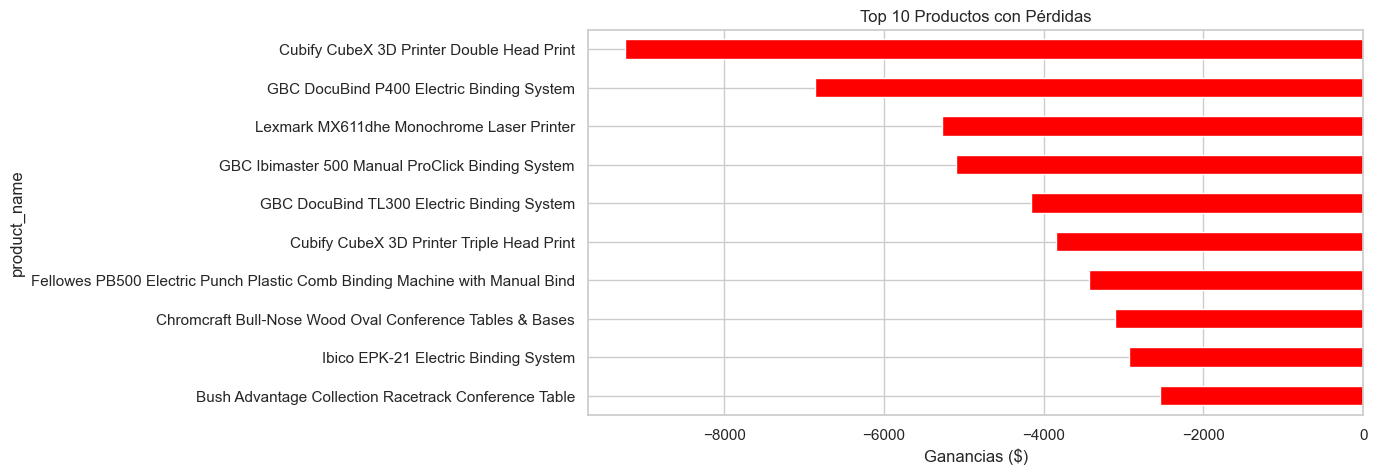

In [15]:
# Productos con pérdida (ganancia negativa)
productos_perdida=df[df['profit']<0].groupby('product_name')['profit'].sum().sort_values().head(10)
productos_perdida.plot(kind='barh',title='Top 10 Productos con Pérdidas',color='red')
ptl.xlabel('Ganancias ($)')
ptl.gca().invert_yaxis()
ptl.show()

In [8]:
#Exportar el DataFrame limpio de Python a CSV
df.to_csv('../data/Superstore_limpio.csv', index=False)

# Crear base de datos SQLite y conectar

In [9]:
import sqlite3
import os

# Ruta para la base de datos
db_path=os.path.join('..','db','superstore.db')

# Conectar a SQLite, si no existe, lo crea
conn=sqlite3.connect(db_path)
cursor=conn.cursor()

## Exportar el DataFrame a SQLite

In [10]:

#Eliminar columna de ayuda para las visuales por error de type al exportar a la db
df = df.drop(columns=['mes_anio'], errors='ignore')

# Exportar el dataframe a la base de datos como una tabla llamada 'ventas'
df.to_sql('ventas', conn, if_exists='replace', index=False)

9994

## Verificar que se cargó bien

In [11]:
# Ver cuántos registros tiene
cursor.execute('SELECT COUNT(*) FROM ventas')
print('Total de registros de la tabla ventas: ', cursor.fetchone()[0])

# Ver primeras filas
cursor.execute('SELECT * FROM ventas LIMIT 5')
for fila in cursor.fetchall():
    print(fila)

Total de registros de la tabla ventas:  9994
(1, 'CA-2016-152156', '2016-11-08 00:00:00', '2016-11-11 00:00:00', 'Second Class', 'CG-12520', 'Claire Gute', 'Consumer', 'United States', 'Henderson', 'Kentucky', 42420, 'South', 'FUR-BO-10001798', 'Furniture', 'Bookcases', 'Bush Somerset Collection Bookcase', 261.96, 2, 0.0, 41.9136)
(2, 'CA-2016-152156', '2016-11-08 00:00:00', '2016-11-11 00:00:00', 'Second Class', 'CG-12520', 'Claire Gute', 'Consumer', 'United States', 'Henderson', 'Kentucky', 42420, 'South', 'FUR-CH-10000454', 'Furniture', 'Chairs', 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back', 731.94, 3, 0.0, 219.582)
(3, 'CA-2016-138688', '2016-06-12 00:00:00', '2016-06-16 00:00:00', 'Second Class', 'DV-13045', 'Darrin Van Huff', 'Corporate', 'United States', 'Los Angeles', 'California', 90036, 'West', 'OFF-LA-10000240', 'Office Supplies', 'Labels', 'Self-Adhesive Address Labels for Typewriters by Universal', 14.62, 2, 0.0, 6.8714)
(4, 'US-2015-108966', '2015-10-11 0

## Consultas SQL útiles

In [12]:
# Total de ventas y ganancias

query="""
SELECT
    ROUND(SUM(sales),2) AS total_ventas,
    ROUND(SUM(profit),2) AS total_ganancias
FROM ventas
"""
pd.read_sql_query(query,conn)

,total_ventas,total_ganancias
0,2297200.86,286397.02


In [13]:
# Ventas por categoría

query="""
SELECT category, ROUND(SUM(sales),2) AS ventas
FROM ventas
GROUP BY category
ORDER BY ventas DESC
"""
pd.read_sql_query(query,conn)

,category,ventas
0,Technology,836154.03
1,Furniture,741999.80
2,Office Supplies,719047.03


In [14]:
#  Ganancia por región

query="""
SELECT region, ROUND(SUM(profit), 2) AS ganancia
FROM ventas
GROUP BY region
ORDER BY ganancia DESC
"""
pd.read_sql_query(query,conn)

,region,ganancia
0,West,108418.45
1,East,91522.78
2,South,46749.43
3,Central,39706.36


In [15]:
# Top 5 productos más vendidos

query="""
SELECT product_name, ROUND(SUM(sales),2) AS total_ventas
FROM ventas 
GROUP BY product_name
ORDER BY total_ventas DESC
LIMIT 5
"""
pd.read_sql_query(query,conn)

,product_name,total_ventas
0,Canon imageCLASS 2200 Advanced Copier,61599.82
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
2,Cisco TelePresence System EX90 Videoconferenci...,22638.48
3,HON 5400 Series Task Chairs for Big and Tall,21870.58
4,GBC DocuBind TL300 Electric Binding System,19823.48


In [16]:
# Cerrar la conexión 
conn.close()